Comments:
- here mainly the mathematical model is described with examples:

    (economic part not tested)
    
    (example with all aspects to be added )
- in SoftwareX paper the software part will be more described

    (gui?, python package, software architecture, ...) 
- in Agriculture paper a usage case is more described

    (spider plots to be corrected, this model should help)
---------

In [31]:
import numpy as np
import matplotlib.pylab as plt

# CloudEdgeAssetsOptimizer

#### [for SoftwareX]

CloudEdgeAssetsOptimizer is a software tool designed to evaluate and optimize the assets within a Cloud and Edge computing network. Its primary purpose is to provide insights and estimations to ensure efficient resource allocation and decision-making.

- One of the key features of CloudEdgeAssetsOptimizer is its ability to estimate the critical number of devices required in a network. This estimation is based on factors such as network traffic, processing capabilities, and user demand. By analyzing these parameters, the software can determine the minimum number of devices needed to handle the workload efficiently, without causing excessive waiting times or delays.

- Additionally, CloudEdgeAssetsOptimizer can estimate the arrival rate of requests or tasks within the network. By considering factors such as user behavior patterns, data processing requirements, and network capacity, the software can predict the rate at which new requests will arrive. This information allows network administrators to ensure that the waiting time for each request remains below a critical threshold, thus optimizing user experience and satisfaction.

- Another important capability of CloudEdgeAssetsOptimizer is its ability to assess the performance of battery-powered Edge devices. By considering the power consumption characteristics of these devices and their expected usage patterns, the software can estimate if a particular device will operate for a specific duration without requiring a battery recharge. This estimation is crucial for planning the deployment of Edge devices and ensuring uninterrupted operation within the network.

- Furthermore, CloudEdgeAssetsOptimizer takes into account economical criteria when determining the optimal number of assets within the network. It considers factors such as the cost of devices, maintenance expenses, energy consumption, and the overall budget constraints. By analyzing these factors, the software can recommend the optimal number of assets that not only meet the technical requirements but also provide the most cost-effective solution.



# 1. Description of Analytical Model

The presented analytical model utilizes mathematical equations and queuing theory to derive estimations for waiting time, refill time of limited resources (for, example, battery discharge time), and the number of data processing devices. It takes into account relevant parameters and system characteristics to provide insights into system performance, resource allocation, and optimization strategies.

The proposed model is novel in that it simultaneously considers waiting time, refill time, and minimum cost when performing these tasks:
- Estimate mean waiting time, when arrival rate of data processing and system parameters are given.
- Find optimum number of processing devices, when arrival rate of data processing and service parameters are given.
- Find maximum arrival rate, when system parameters are determined, to ensure that mean waiting time is below critical.
- Find optimum load balance between processing devices, when arrival rate of data processing is given.

The CloudEdgeAssetsOptimizer is only one use case scenario for the analytical model. It can also be used to estimate resource usage and performance optimization in other fields of interest: traffic management, call centers, service centers and other.

In general case, a data processing network may combine various data processing devices. For example, a data can be acquired from various sources and processed either at the battery-powered Edge devices or on the Cloud servers. By balancing the load between the Edge and Cloud, system resources can be better utilized, and the processing of data at the Edge can help alleviate the load on the Cloud servers. This hybrid architecture optimizes resource utilization, enables real-time processing, and leverages the scalability of the Cloud for complex analytics.

### 1.1. Data Flow Arrival and Load Balancing 

If data processing requests are initiated by users, then mathematically it can modeled as a Poisson process. In such case, the inter-arrival times between requests are assumed to follow an exponential distribution. If the amount of data to be processed is constant or the duration of data processing is determined, then the M/D/1 model can be used to estimate the waiting time in a data processing system. The queueing model takes into account the arrival rate and service rate or time to provide estimates of the waiting time experienced by the requests in the system.  

<p style='background:gray'>
<img src="DataFlowModel2.svg">
</p>

If the total rate of data processing requests $\lambda$ is distributed between a number $N_E$ of Edge devices and $N_C$ Cloud servers, then arrival rates of data processing requests
$$\lambda_E^{(i)} = \lambda \cdot P_E \cdot p_E^{(i)};$$
$$\lambda_C^{(j)} = \lambda \cdot P_C \cdot p_C^{(j)};$$
here:
- $P_E$ - probability that data is directed for processing to a set of Edge devices, and 
- $P_C = 1-P_E$ - probability that data is directed for processing to a set of Cloud servers, 
- $p_E^{(i)}$ and $p_C^{(j)}$ - probabilities that the $i$-th Edge device ($i = 1..N_E$) and $j$-th Cloud server ($j = 1..N_C$) is used for processing.

If the arrival rates between Edge devices and Cloud servers are equally distributed, then 
$$p_E^{(i)}=\frac{1}{N_E}$$ 
and  
$$p_C^{(j)}=\frac{1}{N_C}.$$

### 1.2. Estimation of Mean Waiting Time and Utilization

In this model the mean waiting time in the $i$-th Edge device and $j$-th Cloud server is modeled by M/D/1 queueing system:
$$W_E^{(i)} = \frac{1}{\mu_E^{(i)}}+\frac{\rho_E^{(i)}}{2\mu_E^{(i)}\left(1-\rho_E^{(i)}\right)} $$
$$W_C^{(j)} = \frac{1}{\mu_C^{(j)}}+\frac{\rho_C^{(j)}}{2\mu_C^{(j)}\left(1-\rho_C^{(j)}\right)} $$
here:
- $\mu_E^{(i)} = \frac{1}{T_E^{(i)}}$ - data processing rate of $i$-th Edge device, 
- $T_E^{(i)}$ - the mean data processing time in the $i$-th Edge device;
- $\mu_C^{(j)} = \frac{1}{T_C^{(j)}}$ - data processing rate of $j$-th Cloud server, 
- $T_C^{(j)}$ - the mean data processing time in the $j$-th Cloud server;
- $\rho_E^{(i)} = \frac{\lambda_E^{(i)}}{\mu_E^{(i)}}$ - utilization of $i$-th Edge device, where 
- $\lambda_E^{(i)}$ - arrival rate of data processing requests to the $i$-th Edge device;
- $\rho_C^{(j)} = \frac{\lambda_C^{(j)}}{\mu_C^{(j)}}$ - utilization of $j$-th Cloud server, where 
- $\lambda_C^{(j)}$ - arrival rate of data processing requests to the $j$-th Cloud server;
- $i = 1..N_E$ index of $i$-th Edge device, $N_E$ - number of Edge devices;
- $j = 1..N_C$ index of $j$-th Cloud server, $N_C$ - number of Cloud servers.

For stable system the $\rho_E^{(i)} < 1$ and $\rho_C^{(j)} < 1$ conditions must be ensured. 

It further text the formulas are simplified by removing the indexes $(i)$ and $(j)$, because it is assumed that all the Edge devices are the same and all the Cloud servers are the same.



### 1.3. Finding Maximum Arrival Rate or Minimum Number of Servers 

Waiting time in the system depend on arrival rate and on the number of servers in the system. Therefore, if a number of processing devices $(N_E, N_C)$ and critical waiting time $W_{cr}$ are given,then 
$$\lambda_{Ecr}=N_E\cdot\frac{2 \cdot \mu_E\cdot(W_{cr} \cdot \mu_E - 1)}{2 \cdot W_{cr} \cdot\mu_E -1};$$
$$\lambda_{Ccr}=N_C\cdot\frac{2 \cdot \mu_C\cdot(W_{cr} \cdot \mu_C - 1)}{2 \cdot W_{cr} \cdot\mu_C -1};$$
here $\mu_E$ and $\mu_C$ are service rates of a single Edge and single Cloud server, considering that all the Edge devices are the same, and all the Cloud servers are the same.
The mean waiting time in the system $(W_E,W_C) \leq W_{cr}$ if $\lambda_E \leq \lambda_{Ecr}$ and $\lambda_C \leq \lambda_{Ccr}$.

Using the same principle the critical (minimum) number of data processing devices can be estimated:
$$N_{Ecr}=\frac{\lambda_{E}\cdot(2 \cdot W_{cr} \cdot\mu_E -1)}{2 \cdot \mu_E\cdot(W_{cr} \cdot \mu_E - 1)};$$
$$N_{Ccr}=\frac{\lambda_{C}\cdot(2 \cdot W_{cr} \cdot\mu_C -1)}{2 \cdot \mu_C\cdot(W_{cr} \cdot \mu_C - 1)}.$$


### 1.4. Estimation of Mean Time to Refill Limited Resources

If a system has devices that consume resources while operating, then it is necessary to ensure that the device will be able to operate some period of time while the opportunity to refill the resources is not available. In case of battery-powered devices, we propose to evaluate the mean time till battery discharge for Edge device by
$$T_B = \frac{N_P \cdot T_E}{\rho_E};$$
here:
- $N_P$ - number of continuous data processing cycles to discharge fully charged battery.

In real case, the $N_P$ depends on capacity of actual battery, on device's performance settings and other parallel processes that may use the battery. The latter should also be considered for the exact $N_P$ value.
The $T_B$ value can be used also as a criteria to estimate number of $N_E$ or load balancing by $P_E$.   

### 1.5. Estimation of System Cost and Profit

There are many variables that determine the exact monthly cost of a data processing system.
 
For the sake of simplicity, let's assume that the total cost per hour of the data processing system is:
$$C_{S} = 
\begin{align*}
    \left\{
    \begin{array}{ll}
        N_E \cdot C_E + N_C \cdot C_{Cd}, & \text{dedicated cloud capacity}; \\
        N_E \cdot C_E + N_C \cdot C_{Com}, & \text{on-demand cloud capacity, if } \rho_C = 0; \\
        N_E \cdot C_E + N_C \cdot C_{Co} \cdot \rho_C, & \text{on-demand cloud capacity, if } \rho_C \neq 0; \\
    \end{array}
    \right.
\end{align*}
$$
here:
- $C_E$ - cost per hour for an Edge device,
- $C_{Cd}$ - cost per hour for Cloud server if dedicated capacity is provided,
- $C_{Com}$ - minimum fee per hour for on-demand capacity plan if capacity not used, 
- $C_{Co}$ - pay per hour for on-demand capacity plan if capacity is used. 
$

If such data processing system is managed by a service provider and the revenue per single data processing is $R_p$, then total revenue per hour:
$$R_S = \lambda \cdot P_a \cdot R_p;$$
here $P_a$ - ratio (or probability) of acceptable data processing requests.
For example, if arrival rate for acceptable mean waiting time in the system is $\lambda_{cr}$, then   
$$P_a = \begin{align*}
    \left\{
    \begin{array}{ll}
        \frac{\lambda - \lambda_{cr}}{\lambda}, & \lambda > \lambda_{cr};  \\
        1, & \lambda \leq \lambda_{cr}. \\
    \end{array}
    \right.
\end{align*}$$
Then the profit per hour is
$$P_S = R_S-C_S$$
and the losses per hour of potential profit due to limited resources
$$C_L = \lambda \cdot (1-P_a) \cdot R_p.$$

### 2. Examples


#### 2.1. Calculation of Mean Waiting Time

Consider that data is processed only in a single Cloud server. 
Requests of data processing arrive at rate $\lambda = 20$ req./h. 
Mean data processing time $T_C = 100$ s. 
Calculation of mean waiting time in server: 
$$W_C^{(j)} = \frac{1}{\mu_C^{(j)}}+\frac{\rho_C^{(j)}}{2\mu_C^{(j)}\left(1-\rho_C^{(j)}\right)} $$

Utilization of Cloud server rho_C = 0.56
Mean Waiting time Cloud server: 162.50 s


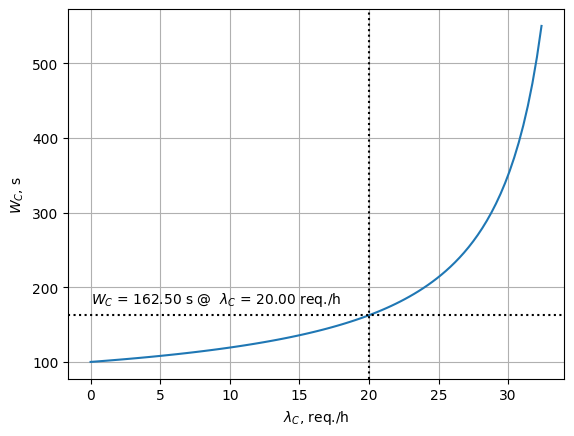

In [32]:
lambda_C = 20 # req/h
T_C_sec = 100 # s

T_C = T_C_sec/3600 # h
mu_C = 1/T_C

rho_C = lambda_C/mu_C

print("Utilization of Cloud server rho_C = %.2f"%rho_C)

if rho_C >= 1:
    raise Exception("System is unstable. Ensure that rho_C < 1")

W_C = 1/mu_C+rho_C/(2*mu_C*(1-rho_C)) 
W_C_sec = W_C*3600

print("Mean Waiting time Cloud server: %.2f s"%W_C_sec)

# plot

lambda_C_array = np.linspace(0,mu_C*0.9,100)
rho_C_array = lambda_C_array/mu_C
W_C_array = 1/mu_C+rho_C_array/(2*mu_C*(1-rho_C_array)) 

plt.figure()
plt.plot(lambda_C_array,W_C_array*3600)
plt.xlabel('$\lambda_C$, req./h')
plt.ylabel('$W_C$, s')
plt.axvline(lambda_C,color='black',linestyle=':')
plt.axhline(W_C_sec,color='black',linestyle=':')
plt.text(0,W_C_sec*1.1,"$W_C$ = %.2f s @  $\lambda_C$ = %.2f req./h"%(W_C_sec,lambda_C))
plt.grid()

#### 2.2. Example. Calculation of Mean Waiting time in the CloudEdge System 

Consider case, when data is processed in a system with multiple Edge devices and multiple Cloud servers. 
This example shows how mean waiting times in Edge devices and Cloud servers can be calculated. 
Requests of data processing arrive at rate $\lambda = 1000$ req./h.
Numbers of Edge devices and Cloud servers - $N_E = 30$ and $N_C = 20$.
Mean service times in Edge devices and Cloud servers - $T_E = 200$ s and $T_C = 100$ s.

By changing $P_E$ it is possible to change the resulting waiting time and utilization of devices. Therefore, this model also can be used for system performance and load balancing optimization.

In [33]:
# System parameters
Lambda = 1000 # req/h

N_E = 30
N_C = 20

T_E_sec = 200 # s
T_C_sec = 100 # s

# Load balancing
P_E = 0.4

#--------------------------
T_E = T_E_sec/3600 # h
T_C = T_C_sec/3600 # h

mu_E = 1/T_E
mu_C = 1/T_C

p_E = 1/N_E
p_C = 1/N_C

P_C = 1 - P_E
lambda_E = Lambda*P_E*p_E
lambda_C = Lambda*P_C*p_C

rho_E = lambda_E/mu_E
rho_C = lambda_C/mu_C

print("Utilization of Edge device  rho_E = %.2f"%rho_E)
print("Utilization of Cloud server rho_C = %.2f"%rho_C)

if rho_E >= 1 or rho_C >= 1:
    raise Exception("System is unstable. Ensure that rho_E < 1 and rho_C < 1")

W_E = 1/mu_E+rho_E/(2*mu_E*(1-rho_E)) 
W_C = 1/mu_C+rho_C/(2*mu_C*(1-rho_C)) 

W_E_sec = W_E*3600
W_C_sec = W_C*3600

# Result
print("Mean Waiting time Edge device: %.2f s"%W_E_sec)
print("Mean Waiting time Cloud server: %.2f s"%W_C_sec)


Utilization of Edge device  rho_E = 0.74
Utilization of Cloud server rho_C = 0.83
Mean Waiting time Edge device: 485.71 s
Mean Waiting time Cloud server: 350.00 s


#### 2.3. Example. Estimation of Mean Working Time on Battery in the CloudEdge System 

Consider the same case as in 2.2 Example. 
An Edge device can perform $N_P = 200$ continuous data processing cycles to discharge fully charged battery.
The Edge device must be available for $T_a = 8$ h working hours.

Calculate the mean working time on battery of an Edge device $T_B$ and estimate if $T_B \geq T_a$. 

In [34]:
N_P = 200  
T_a = 8 # h
# T_a = 16 # h
T_B = N_P*T_E/rho_E # h
print("The mean working time on battery T_B = %.2f h\n"%T_B)

if T_B >= T_a:
    print("The mean working time on battery T_B >= T_a:")
    print("  - the load on Edge devices may be increased or less number of Edge devices may be used")
else:
    print("The mean working time on battery T_B < T_a:")
    print("  - decrease load on Edge devices or add more Edge devices to the system")
    print("  - the load on Edge devices may be increased or less number of Edge devices may be used")


The mean working time on battery T_B = 15.00 h

The mean working time on battery T_B >= T_a:
  - the load on Edge devices may be increased or less number of Edge devices may be used


### 2.4. Example. Finding Maximum Arrival Rate For Given System and Performance Requirements

Consider a data processing system with $N_C = 10$ Cloud servers. Mean data processing time $T_C=100$ s. What is maximum arrival rate of data processing requests per hour $\lambda_{cr}$ if critical mean waiting time $W_{cr} = 300$ s?

$$\lambda_{Ccr}=N_C\cdot\frac{2 \cdot \mu_C\cdot(W_{cr} \cdot \mu_C - 1)}{2 \cdot W_{cr} \cdot\mu_C -1};$$

In [35]:
N_C = 10
T_C_sec = 100 # s
W_cr_sec = 300 # s

#------------------------------
T_C = T_C_sec/3600 # h
W_cr = W_cr_sec/3600 # h

mu_C = 1/T_C

Lambda_Ccr = N_C*(2*mu_C*(W_cr*mu_C-1))/(2*W_cr*mu_C-1)
print("Maximum Lambda_Ccr = %.2f req./h, for given N_C = %d and W_cr = %.2f s"%(Lambda_Ccr,N_C,W_cr_sec))


Maximum Lambda_Ccr = 288.00 req./h, for given N_C = 10 and W_cr = 300.00 s


### 2.5. Example. Finding Minimum Number of Servers For Given Arrival Rate and Performance Requirements

Consider a data processing system with Cloud servers. Mean time of service $T_C = 200$ s. Requests of data processing arrive at rate $\lambda_C = 1000$ req./h. The mean waiting time must be < 300 s. Find the minimum number of servers.


$$N_{Ccr}=\frac{\lambda_{C}\cdot(2 \cdot W_{cr} \cdot\mu_C -1)}{2 \cdot \mu_C\cdot(W_{cr} \cdot \mu_C - 1)}.$$

In [36]:
lambda_C = 1000 # req./h
T_C_sec = 200 # s
W_cr_sec = 300 # s

#------------------------------
T_C = T_C_sec/3600 # h
W_cr = W_cr_sec/3600 # h

mu_C = 1/T_C

N_Ccr = lambda_C*(2*W_cr*mu_C-1)/(2*mu_C*(W_cr*mu_C-1))
print("Minimum number of servers N_C = %d"%N_Ccr)



Minimum number of servers N_C = 111
